In [304]:
import pandas as pd
import numpy as np

In [305]:
df = pd.read_csv('C:/Users/Rutwik Ramdham/Desktop/Udemy/Datasets/ecommerce_dataset1.csv')
print(df.head())
print(df.describe())

   OrderID  ProductPrice  Quantity  CustomerAge  ProductReviews  \
0        1        839.68       1.0    44.184047            18.0   
1        2         47.23       1.0    11.608463            11.0   
2        3         62.95       4.0    18.834189            26.0   
3        4         80.46       1.0    40.147378             NaN   
4        5         45.32       3.0    44.344160            19.0   

   ProductRating  DiscountPercentage  CustomerTenure ProductCategory  \
0           2.58               45.44           15.84        Clothing   
1           4.41               47.51            7.92          Sports   
2           4.02               13.46           30.24            Home   
3           3.07               37.71           52.10        Clothing   
4           3.29               11.94            0.01          Sports   

  DeliveryType PaymentMethod CustomerLocation ReturnStatus  BrowsingTime  
0      Express        PayPal          Central          Yes        212.17  
1     Standard

In [306]:
#shape of the dataframe
df.shape

(2010, 14)

In [307]:
#Check for duplicate rows and stores in df_duplicates
df_duplicates = df[df.duplicated(keep='last')]
df_duplicates

,OrderID,ProductPrice,Quantity,CustomerAge,ProductReviews,ProductRating,DiscountPercentage,CustomerTenure,ProductCategory,DeliveryType,PaymentMethod,CustomerLocation,ReturnStatus,BrowsingTime
0,1,839.68,1.0,44.184047,18.0,2.58,45.44,15.84,Clothing,Express,PayPal,Central,Yes,212.17
1,2,47.23,1.0,11.608463,11.0,4.41,47.51,7.92,Sports,Standard,Debit Card,Central,Yes,96.08
2,3,62.95,4.0,18.834189,26.0,4.02,13.46,30.24,Home,Express,Debit Card,North,No,115.24
3,4,80.46,1.0,40.147378,NaN,3.07,37.71,52.10,Clothing,Overnight,UPI,North,Yes,136.18
4,5,45.32,3.0,44.344160,19.0,3.29,11.94,0.01,Sports,Express,PayPal,Central,Yes,17.15
5,6,45.32,1.0,44.623125,19.0,1.52,36.88,27.94,Electronics,Standard,Credit Card,East,Yes,142.69
6,7,81.58,2.0,23.194456,22.0,4.36,39.87,34.96,Clothing,Express,Credit Card,North,Yes,51.85
7,8,65.35,5.0,20.326015,19.0,4.15,12.36,5.66,Sports,Standard,Credit Card,Central,No,124.08
8,9,40.61,4.0,27.400477,20.0,3.63,35.79,16.14,Sports,Standard,PayPal,South,No,109.82
9,10,NaN,3.0,38.598091,22.0,2.86,40.61,2.24,Books,Overnight,Debit Card,West,Yes,270.85


In [308]:
#Removeing duplicate rows
df = df.drop_duplicates(keep='first')

In [309]:
#shape after duplicates removal
df.shape

(2000, 14)

In [310]:
#checking for missing values
df.isnull().sum()

OrderID                 0
ProductPrice           97
Quantity               99
CustomerAge            99
ProductReviews        100
ProductRating           0
DiscountPercentage      0
CustomerTenure          0
ProductCategory         0
DeliveryType            0
PaymentMethod           0
CustomerLocation        0
ReturnStatus            0
BrowsingTime            0
dtype: int64

In [311]:
#checking for typecast of columns
df.dtypes

OrderID                 int64
ProductPrice          float64
Quantity              float64
CustomerAge           float64
ProductReviews        float64
ProductRating         float64
DiscountPercentage    float64
CustomerTenure        float64
ProductCategory        object
DeliveryType           object
PaymentMethod          object
CustomerLocation       object
ReturnStatus           object
BrowsingTime          float64
dtype: object

In [312]:
#checking for extra spaces and mistakes in categorical columns
cat_columns = ['ProductCategory','DeliveryType','PaymentMethod','CustomerLocation','ReturnStatus']
for col in cat_columns:
    print(f'Unique values in {col} before cleaning')
    print(df[col].unique())
    df[col] = df[col].str.strip().str.title()
    print(f'Unique values in {col} after cleaning')
    print(df[col].unique()) 


Unique values in ProductCategory before cleaning
['Clothing' 'Sports' 'Home' 'Electronics' 'Books' 'BOOKS' 'electronics'
 'clothing']
Unique values in ProductCategory after cleaning
['Clothing' 'Sports' 'Home' 'Electronics' 'Books']
Unique values in DeliveryType before cleaning
['Express' 'Standard' 'Overnight' 'standard ' ' EXPRESS']
Unique values in DeliveryType after cleaning
['Express' 'Standard' 'Overnight']
Unique values in PaymentMethod before cleaning
['PayPal' 'Debit Card' 'UPI' 'Credit Card']
Unique values in PaymentMethod after cleaning
['Paypal' 'Debit Card' 'Upi' 'Credit Card']
Unique values in CustomerLocation before cleaning
['Central' 'North' 'East' 'South' 'West']
Unique values in CustomerLocation after cleaning
['Central' 'North' 'East' 'South' 'West']
Unique values in ReturnStatus before cleaning
['Yes' 'No']
Unique values in ReturnStatus after cleaning
['Yes' 'No']


In [313]:
from sklearn.impute import SimpleImputer
Median_imputer = SimpleImputer(strategy='median',missing_values=np.nan)

In [314]:
#implimenting median value in place of missing values for ProductPrice column
print('Mean and Median for ProductPrice is:',df.CustomerAge.mean()
      ,'and',df.CustomerAge.median(),'respectively')  
print("Applying median imputation for ProductPrice column")

#applying median imputation for ProductPrice column
df[['ProductPrice']] = Median_imputer.fit_transform(df[['ProductPrice']])
print("In ProductPrice, missing values after median imputation are:",df.ProductPrice.isnull().sum())                                       #checking for missing values again

Mean and Median for ProductPrice is: 36.33034968574276 and 35.49160456 respectively
Applying median imputation for ProductPrice column
In ProductPrice, missing values after median imputation are: 0


In [315]:
print("Mean and Median for Customer age is:",df.CustomerAge.mean(),
      'and',df.CustomerAge.median(),'respectively')
print("Applying median imputation for CustomerAge column")

#applying median imputation for CustomerAge column as well

df[['CustomerAge']] = Median_imputer.fit_transform(df[['CustomerAge']])
print("In CustomerAge column, missing values after imputation are:",df.CustomerAge.isnull().sum())

Mean and Median for Customer age is: 36.33034968574276 and 35.49160456 respectively
Applying median imputation for CustomerAge column
In CustomerAge column, missing values after imputation are: 0


In [316]:
#Checking for Quantity column
print("Mean, Median and Mode for Quantity is:",df.Quantity.mean()
      ,df.Quantity.median(),'and',df.Quantity.mode(),'respectively')

print("Applying median imputation for Quantity column")
#applying median imputation for Quantity column as well
df[['Quantity']] = Median_imputer.fit_transform(df[['Quantity']])
print("In Quantity column, missing values after imputation are:",df.Quantity.isnull().sum())

Mean, Median and Mode for Quantity is: 4.910047343503419 3.0 and 0    3.0
Name: Quantity, dtype: float64 respectively
Applying median imputation for Quantity column
In Quantity column, missing values after imputation are: 0


In [317]:
#checking for ProductReviews column
print("Mean, Median for Quantity is:",df.ProductReviews.mean(),
      'and',df.ProductReviews.median(),'respectively')
print('Appling Median for ProdcutReviews column')
#applying median imputation on Productreviews
df[['ProductReviews']] = Median_imputer.fit_transform(df[['ProductReviews']])
print("In ProductReviews column, missing values after imputation are:",df.ProductReviews.isnull().sum())

Mean, Median for Quantity is: 19.993157894736843 and 20.0 respectively
Appling Median for ProdcutReviews column
In ProductReviews column, missing values after imputation are: 0


In [318]:
print("Hence, there are no null values in the dataset after imputation process.\n",df.isnull().sum())


Hence, there are no null values in the dataset after imputation process.
 OrderID               0
ProductPrice          0
Quantity              0
CustomerAge           0
ProductReviews        0
ProductRating         0
DiscountPercentage    0
CustomerTenure        0
ProductCategory       0
DeliveryType          0
PaymentMethod         0
CustomerLocation      0
ReturnStatus          0
BrowsingTime          0
dtype: int64


<Axes: >

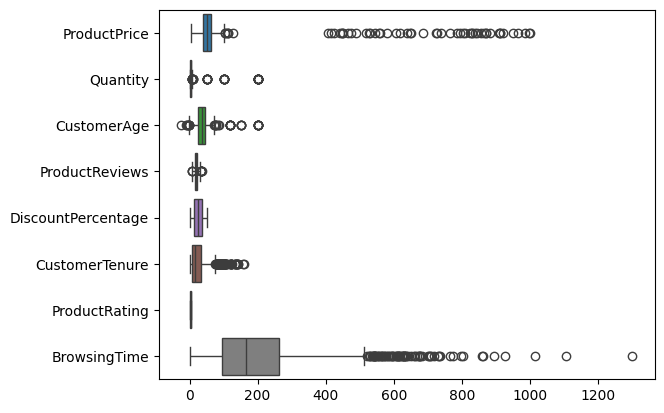

In [319]:
#Checking for outliers in the dataset
import seaborn as sns
sns.boxplot(df[['ProductPrice','Quantity','CustomerAge','ProductReviews','DiscountPercentage','CustomerTenure','ProductRating','BrowsingTime']],orient='h')

In [320]:
#Making a copy of orignal for references
og= df[['ProductPrice','Quantity','CustomerTenure','BrowsingTime']]
df_og = pd.DataFrame(og)
df_og.head()

print("Orignal Price, Quantity, CustomerTenure and BrowsingTime is stored in another variable(df_og)")

Orignal Price, Quantity, CustomerTenure and BrowsingTime is stored in another variable(df_og)


ProductPrice','Quantity','CustomerAge','ProductReviews','CustomerTenure', all these columns has outliers and need to be treated


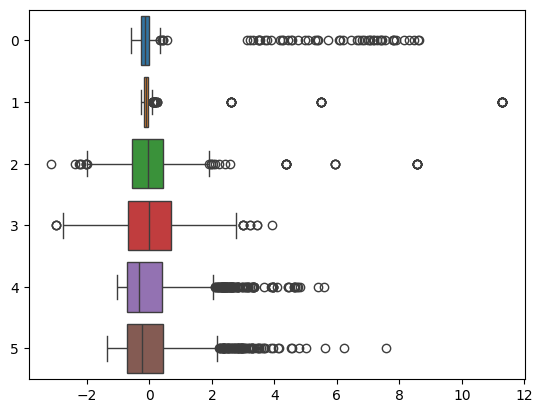

In [321]:
#temperorily scaling the columns for better view in boxplot 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Columns = scaler.fit_transform(df[['ProductPrice','Quantity','CustomerAge','ProductReviews','CustomerTenure','BrowsingTime']])
sns.boxplot(scaled_Columns,orient='h')

print("ProductPrice','Quantity','CustomerAge','ProductReviews','CustomerTenure', all these columns has outliers and need to be treated")

In [322]:
print('Checking the skewness of the data before and after log transformation\n')
from scipy.stats import skew

skewness_beforelogprice = skew(df['ProductPrice'])
print("Skewness of ProductPrice before log_tranformation:",skewness_beforelogprice)

skewness_price = skew(np.log1p(df['ProductPrice']))
print("Skewness of ProductPrice after log_transformation:",skewness_price)
df['ProductPrice'] = np.log1p(df['ProductPrice'])

skewness_Qunatity_beforelogprice = skew(df['Quantity'])
print("Skewness of Quantity before log_tranformation:",skewness_Qunatity_beforelogprice)

skewness_Qunatity_beforelogprice = skew(np.log1p(df['Quantity']))
print("Skewness of Quantity after log_transformation:",skewness_Qunatity_beforelogprice)
df['Quantity'] = np.log1p(df["Quantity"])

skewness_CustomerTenure_beforelogprice = skew(df['CustomerTenure'])
print("Skewness of CustomerTenure before log_tranformation:",skewness_CustomerTenure_beforelogprice)

skewness_CustomerTenure_beforelogprice = skew(np.log1p(df['CustomerTenure']))
print("Skewness of CustomerTenure after log_transformation:",skewness_CustomerTenure_beforelogprice)
df['CustomerTenure'] = np.log1p(df["CustomerTenure"])

skewness_BrowsingTime_beforelogprice = skew(df['BrowsingTime'])
print("Skewness of BrowsingTime before log_tranformation:",skewness_BrowsingTime_beforelogprice)

skewness_BrowsingTime_beforelogprice = skew(np.log1p(df['BrowsingTime']))
print("Skewness of BrowsingTime after log_transformation:",skewness_BrowsingTime_beforelogprice)
df['BrowsingTime'] = np.log1p(df["BrowsingTime"])

Checking the skewness of the data before and after log transformation

Skewness of ProductPrice before log_tranformation: 6.423123502779187
Skewness of ProductPrice after log_transformation: 1.049158537467299
Skewness of Quantity before log_tranformation: 10.091848578059285
Skewness of Quantity after log_transformation: 2.195579693476692
Skewness of CustomerTenure before log_tranformation: 1.783660121513352
Skewness of CustomerTenure after log_transformation: -0.45431594869942005
Skewness of BrowsingTime before log_tranformation: 1.6772701427095131
Skewness of BrowsingTime after log_transformation: -0.6662635382825625


In [323]:
#capping negative age to realistic/minimum age 
df.loc[df['CustomerAge']<18,'CustomerAge'] = 18

print("Negative and low ages are now capped at 18")

Negative and low ages are now capped at 18


In [324]:
#using IQR method for outlier treatment
from feature_engine.outliers import Winsorizer
#getting the Winsorizer ready for the IQR treatment
wz = Winsorizer(capping_method='iqr',        #method using which is IQR
                tail='both',                 #applying on both ends
                fold=1.5,                    #taking fold value as 3
                variables=['ProductPrice','Quantity','CustomerAge','ProductReviews','CustomerTenure','BrowsingTime'])   #Columns applying

In [325]:
#appling fit transform
df[['ProductPrice','Quantity','CustomerAge',
    'ProductReviews','CustomerTenure','BrowsingTime']] = wz.fit_transform(df[['ProductPrice','Quantity','CustomerAge',
                                                               'ProductReviews','CustomerTenure','BrowsingTime']])

In [326]:
productprice_skew_after_IQR = skew(df['ProductPrice'])
quantity_skew_after_IQR = skew(df['Quantity'])
print('Skewness of Quantity after IQR:',quantity_skew_after_IQR)
print('Skewness of ProductPrice after IQR:',productprice_skew_after_IQR)

Skewness of Quantity after IQR: -0.24151246125569548
Skewness of ProductPrice after IQR: -0.34845219647195197


The majority of PRoductPrice is heavily clustered at lower end.

Here the normal IQR with fold 1.5 /  3.0 is not working we are lossing lots of valid price points.
Therefore, will be applying percentile method to allow most high prices to remain and only capping the true extremes.

All the extreme outliers has been treated by using IQR technique
Below is the BoxPlot for the columns


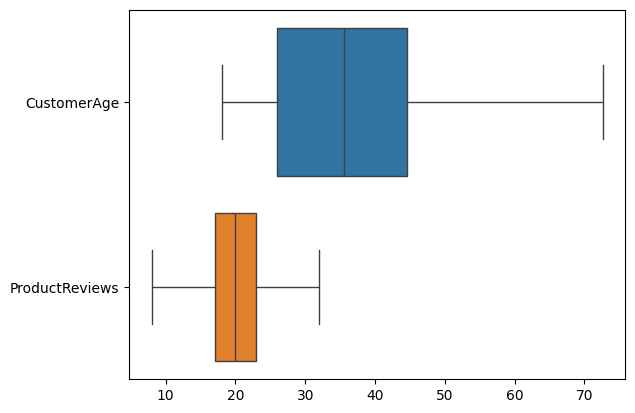

In [327]:
#checking for any outliers left
sns.boxplot(df[['CustomerAge','ProductReviews']],orient='h')

print("All the extreme outliers has been treated by using IQR technique\n" \
"Below is the BoxPlot for the columns")

No outliers in log_transformed(ProductPrice Quantity CustomerTenure BrowsingTime) columns.


<Axes: >

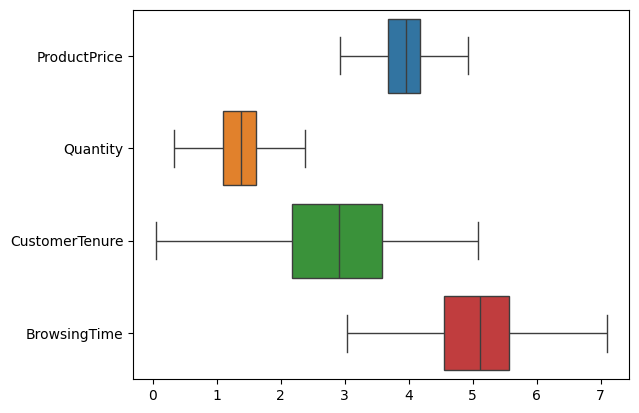

In [328]:
print('No outliers in log_transformed(ProductPrice','Quantity','CustomerTenure BrowsingTime) columns.')
sns.boxplot(df[['ProductPrice','Quantity','CustomerTenure','BrowsingTime']],orient='h')

In [329]:
df.head(5)

,OrderID,ProductPrice,Quantity,CustomerAge,ProductReviews,ProductRating,DiscountPercentage,CustomerTenure,ProductCategory,DeliveryType,PaymentMethod,CustomerLocation,ReturnStatus,BrowsingTime
0,1,4.928039,0.693147,44.184047,18.0,2.58,45.44,2.823757,Clothing,Express,Paypal,Central,Yes,5.362090
1,2,3.875981,0.693147,18.000000,11.0,4.41,47.51,2.188296,Sports,Standard,Debit Card,Central,Yes,4.575535
2,3,4.158102,1.609438,18.834189,26.0,4.02,13.46,3.441699,Home,Express,Debit Card,North,No,4.755657
3,4,4.400112,0.693147,40.147378,20.0,3.07,37.71,3.972177,Clothing,Overnight,Upi,North,Yes,4.921294
4,5,3.835574,1.386294,44.344160,19.0,3.29,11.94,0.049275,Sports,Express,Paypal,Central,Yes,3.033202


In [330]:
#converting categorical columns into numerical columns
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [331]:
#encoding the columns and saving it into encoded as an array.
encoded=encoder.fit_transform(df[['ProductCategory','DeliveryType','PaymentMethod','CustomerLocation','ReturnStatus']]).toarray()
print('Encoding is saved under encoded as an array')

Encoding is saved under encoded as an array


In [332]:
#encoded data is converted to Dataframe and saved into encoded_df
encoded_df = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())
print('Saved encoded array from encoded is converted to DataFrame and saved into encoded_df')
encoded_df.head()

Saved encoded array from encoded is converted to DataFrame and saved into encoded_df


,ProductCategory_Books,ProductCategory_Clothing,ProductCategory_Electronics,ProductCategory_Home,ProductCategory_Sports,DeliveryType_Express,DeliveryType_Overnight,DeliveryType_Standard,PaymentMethod_Credit Card,PaymentMethod_Debit Card,PaymentMethod_Paypal,PaymentMethod_Upi,CustomerLocation_Central,CustomerLocation_East,CustomerLocation_North,CustomerLocation_South,CustomerLocation_West,ReturnStatus_No,ReturnStatus_Yes
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [333]:
#merging encoded columns with the dataset

print('Categorial columns are succefully encoded into numerical columns')

Categorial columns are succefully encoded into numerical columns


In [334]:
#droping the categorical columns which are now of no use
df.drop(['ProductCategory','DeliveryType','PaymentMethod','CustomerLocation','ReturnStatus'],axis=1,inplace=True)
df.shape

(2000, 9)

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   OrderID             2000 non-null   int64  
 1   ProductPrice        2000 non-null   float64
 2   Quantity            2000 non-null   float64
 3   CustomerAge         2000 non-null   float64
 4   ProductReviews      2000 non-null   float64
 5   ProductRating       2000 non-null   float64
 6   DiscountPercentage  2000 non-null   float64
 7   CustomerTenure      2000 non-null   float64
 8   BrowsingTime        2000 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 156.2 KB


In [336]:
df = pd.concat([df,encoded_df],axis=1)

In [337]:
#Creating new feature Sales.

df['Sales'] = df['ProductPrice'] * df['Quantity']
print("New feature Sales has been created.\n")
print(df[['ProductPrice','Quantity','Sales']])

New feature Sales has been created.

      ProductPrice  Quantity     Sales
0         4.928039  0.693147  3.415857
1         3.875981  0.693147  2.686625
2         4.158102  1.609438  6.692206
3         4.400112  0.693147  3.049925
4         3.835574  1.386294  5.317234
...            ...       ...       ...
1995      4.282206  1.791759  7.672684
1996      3.921379  1.098612  4.308075
1997      3.507358  1.791759  6.284341
1998      3.865770  0.693147  2.679547
1999      3.586293  1.098612  3.939945

[2000 rows x 3 columns]


In [338]:
sales_skew_after_IQR = skew(df['Sales'])
print(sales_skew_after_IQR)

-0.12957608360361397


In [339]:
excel_path = 'Rutwik_Ramdham_Ecommerce_dataset_cleaned.xlsx'
with pd.ExcelWriter(excel_path) as writer:  
    df.to_excel(writer,sheet_name='Explored_data',index=False)
    df_og.to_excel(writer,sheet_name='Orignal_values',index=False)
    df_duplicates.to_excel(writer,sheet_name='Removed_Duplicates',index=False)

print("Sheet 1: Explored Data (contians df)")
print("Sheet 2: Orignal Values but cleaned (contains df_og)")
print("Sheet 1: Duplicate Data (contians df_duplicates)")


Sheet 1: Explored Data (contians df)
Sheet 2: Orignal Values but cleaned (contains df_og)
Sheet 1: Duplicate Data (contians df_duplicates)
